In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
%matplotlib inline

In order to create some reasonalbe values, for each product we draw a demand curve for each customer and we evaluate the marginal reward given by them in each point. In order to make this analysis we assume that there is no indirect reward from other products.
As demand curve we use the cumulative distribution function $\phi(x)$ for a Gaussian distribution with mean $\mu$ and standar deviation $\sigma$.

$\sigma$ controls the smoothness of the demand curve around the price $\mu$. If $\sigma$ is high, the curve will be steeper.

## Skate clothes shop (like VANS)
generally skate clothings are unisex $\rightarrow$ we do not need to distinguish products for males and females.
We assume the number of items bought does not depend on the price.

| product | prices (indicative) | quantity( indicative)| $\alpha$ male| $\alpha$ female| $\alpha$ old|
| --- | --- | --- | --- | --- | --- |
| t-shirt| 40 | 3 | 0.2 | 0.4 |0.2|
| hoodie| 120 | 2 | 0.2 |0.5|0.2|
| shoes| 90 | 1 | 0.2 | 0.1 |0.1|
| hat| 30 | 3 | 0.2 | 0 | 0.1 |
| shirt| 80 | 2 | 0.2 | 0 | 0.4 |


## Business graph
| |t-shirt (0)| hoodie (1)| shoes(2)| hat(3)| shirt(4)| 
| --- | --- | --- | --- | --- | --- |
| t-shirt|  | 1 |  |  | 2 |
| hoodie| 1 |  |  | | 2 |
| shoes| 1 |  |  | 2 ||
| hat| 1 |  | 2 |  |  |
| shirt| 1 |  | 2 |  |  |

In [2]:
def cv_curve(mu, sigma, x, scale):
    y = norm.pdf(x, mu, sigma)
    y = y / (max(y) - min(y))
    return y * scale
    

In [38]:
import json
import os

graph = {
    "graph":[
    [1, 4],
    [0, 4],
    [0, 3],
    [0, 2],
    [0, 2]
    ]
}

file_path = os.path.abspath('') + "\\code\\data\\business_full_graph2.json"


#file_path = "{}/../data/business_full_graph2.json".format(os.path.dirname(os.path.abspath(__file__)))
with open(file_path, 'w') as outfile:
    json.dump(graph, outfile)

## Customer graph 
we assume customers behave similarly except for the hat and shirts. Only boys are interested in hats. Girls are not interested in shirts.

We assume if a customer starts from an upper body clothing will be interested in the upper part.


|BOY|t-shirt | hoodie | shoes| hat| shirt| 
| --- | --- | --- | --- | --- | --- |
| t-shirt| 0 | 0.3 | 0.1 | 0.2 |0.2|
| hoodie| 0.5 | 0 | 0.2 |0.2|0.1|
| shoes| 0.4 | 0.2 | 0 | 0.3 |0.1|
| hat| 0.6 | 0.3 | 0.1 | 0 | 0.1 |
| shirt| 0.5 | 0.1 | 0.1 | 0.1 | 0 |

In [4]:
boy_graph = [
        [0, 0.3, 0.1, 0.2, 0.2],
        [0.5, 0, 0.2, 0.2, 0.1],
        [0.4, 0.2, 0, 0.3, 0.1],
        [0.6, 0.3, 0.1, 0, 0.1],
        [0.5, 0.1, 0.1, 0.1, 0]
      ]

|GIRL|t-shirt | hoodie | shoes| hat| shirt| 
| --- | --- | --- | --- | --- | --- |
| t-shirt| 0 | 0.2 | 0.1 | 0 |0.05|
| hoodie| 0.5 | 0 | 0.1 |0|0.05|
| shoes| 0.4 | 0.25 | 0 | 0 |0.05|
| hat| 0.5 | 0.3 | 0.1 | 0 | 0.05 |
| shirt| 0.5 | 0.1 | 0.1 | 0 | 0 |

In [5]:
girl_graph = [
        [0, 0.2, 0.1, 0, 0.05],
        [0.5, 0, 0.1, 0, 0.05],
        [0.4, 0.25, 0, 0, 0.05],
        [0.5, 0.3, 0.1, 0, 0.05],
        [0.5, 0.1, 0.1, 0, 0]
      ]

|OLD|t-shirt | hoodie | shoes| hat| shirt| 
| --- | --- | --- | --- | --- | --- |
| t-shirt| 0 | 0.3 | 0.1 | 0|0.3|
| hoodie| 0.5 | 0 | 0.2 |0|0.3|
| shoes| 0.4 | 0.2 | 0 | 0 |0.3|
| hat| 0.6 | 0.3 | 0.1 | 0 | 0.3 |
| shirt| 0.4 | 0.1 | 0.1 | 0| 0 |

In [6]:
old_graph = [
        [0, 0.3, 0.1, 0, 0.3],
        [0.5, 0, 0.2, 0, 0.3],
        [0.4, 0.2, 0, 0, 0.3],
        [0.6, 0.3, 0.1, 0, 0.3],
        [0.4, 0.1, 0.1, 0, 0]
      ]

In [7]:
customer_distribution = [0.5, 0.3, 0.2]

In [8]:
MAXIMUM_PRICE = 150
cents = 100
classes = 3
alphas = [ # rows products, columns classes. In this case socks and hats alphas has been set to the probability of clicking on it when interacting with the web
    [0.2, 0.4, 0.2], 
    [0.2, 0.5, 0.2], 
    [0.2, 0.09998, 0.1],
    [0.2, 0.00001, 0.1],
    [0.2, 0.00001, 0.4]
]

n_items = [
    [1.5, 1.2, 1.2], 
    [1.2, 1.2, 1], 
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 2]
]

prices = np.linspace(0, MAXIMUM_PRICE, cents * MAXIMUM_PRICE) # we consider the range of prices that go from 0 to MAXIMUM PRICE


## T-shirt

young people are more likely to be biased by the price: if a product is expensive is more attractive. Old people have decreasing demand curve, young people increasing curve

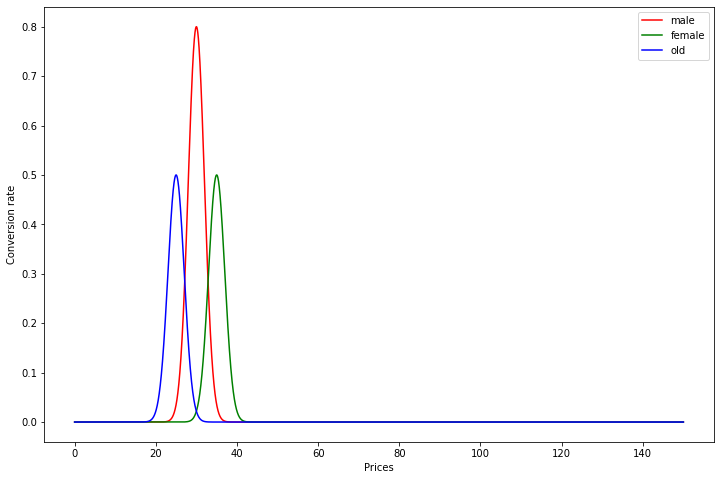

In [9]:

mu_1 = [30, 35, 25]
sigma_1 = [2, 2, 2]
scale = [0.8, 0.5, 0.5]
cv_1 = []
cv_1.append(cv_curve(mu_1[0], sigma_1[0], prices, scale[0]))
cv_1.append(cv_curve(mu_1[1], sigma_1[1], prices, scale[1]))
cv_1.append(cv_curve(mu_1[2], sigma_1[2], prices, scale[2]))
cv_1


plt.figure(figsize=(12,8))
plt.plot(prices, cv_1[0], color="red", label="male")
plt.plot(prices, cv_1[1], color="green", label="female")
plt.plot(prices, cv_1[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()


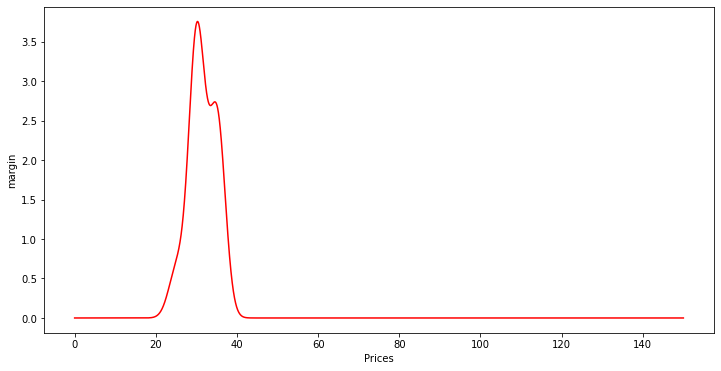

In [10]:
expected_margin_1 = 0
for i in range(classes):
    expected_margin_1 += cv_1[i] * customer_distribution[i] * alphas[0][i] * n_items[0][i]
expected_margin_1 = expected_margin_1 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_1, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

From the plot above we can take prices 25, 30 , 35, 40 that present very different margins.

In [11]:
selected_prices_1 = np.array([20, 25, 30, 35]) * cents
product1_margins_1 = [expected_margin_1[int(p)] for p in selected_prices_1]
product1_margins_1

[0.021135294837646135,
 0.7321412768872693,
 3.7269454233793398,
 2.7041809998402444]

now we can find the conversion rates corresponding to the prices:


In [12]:
c1_p1 = [cv_1[0][p] for p in selected_prices_1] 
c2_p1 = [cv_1[1][p] for p in selected_prices_1]
c3_p1 = [cv_1[2][p] for p in selected_prices_1]
print(c1_p1, c2_p1, c3_p1)

[2.9912783565706134e-06, 0.03522286172820658, 0.8, 0.03504716360532362] [3.066263808955691e-13, 1.871107787584974e-06, 0.02202346433524691, 0.5] [0.022005116647955725, 0.5, 0.021913607238088315, 1.8524874837932936e-06]


# Hoodie
Old people are not baiased by the price on the quality, thus their conversion rate decreases.

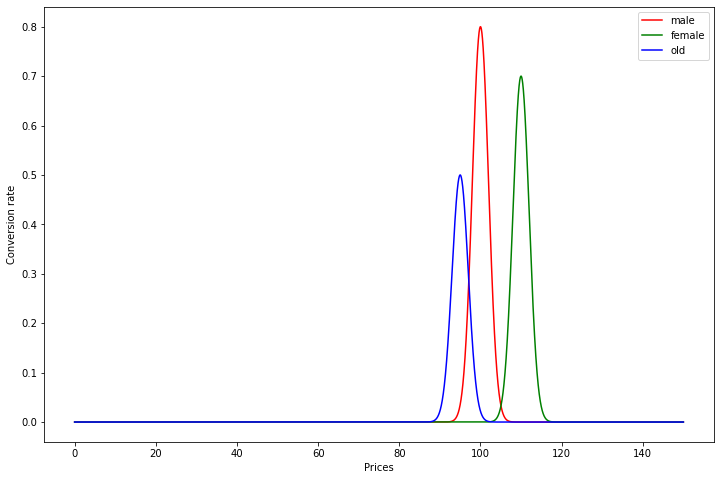

In [13]:
mu_2 = [100, 110 ,95]
sigma_2 = [2, 2, 2]
scale_2 = [0.8, 0.7, 0.5]
cv_2 = []
cv_2.append(cv_curve(mu_2[0], sigma_2[0], prices, scale_2[0]))
cv_2.append(cv_curve(mu_2[1], sigma_2[1], prices, scale_2[1]))
cv_2.append(cv_curve(mu_2[2], sigma_2[2], prices, scale_2[2]))
cv_2


plt.figure(figsize=(12,8))
plt.plot(prices, cv_2[0], color="red", label="male")
plt.plot(prices, cv_2[1], color="green", label="female")
plt.plot(prices, cv_2[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

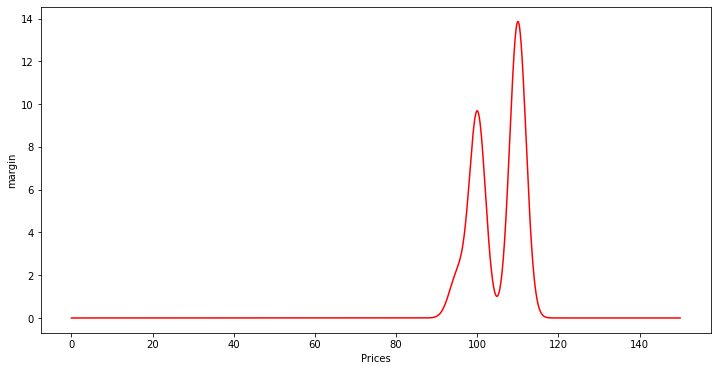

In [14]:
expected_margin_2 = 0
for i in range(classes):
    expected_margin_2 += cv_2[i] * customer_distribution[i] * alphas[1][i] * n_items[1][i]
expected_margin_2 = expected_margin_2 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_2, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()


In [15]:
selected_prices_2 = np.array([92, 98, 103, 110]) * cents
product1_margins_2 = [expected_margin_2[p] for p in selected_prices_2]
product1_margins_2

[0.6031526748577598,
 6.3585200325755755,
 3.2232871174356528,
 13.860881836542656]

In [16]:
c1_p2 = [cv_2[0][p] for p in selected_prices_2] 
c2_p2 = [cv_2[1][p] for p in selected_prices_2]
c3_p2 = [cv_2[2][p] for p in selected_prices_2]
print(c1_p2, c2_p2, c3_p2)

[0.00027168170459382547, 0.4868103708103235, 0.25838659114569096, 2.9271437463300646e-06] [1.8542026330477384e-18, 1.0871968206545667e-08, 0.0015497487130994502, 0.6999959161340806] [0.16307421159258698, 0.16153213743090486, 0.00016544270053872847, 2.968189445362496e-13]


## shoes
People are convinced expensive shoes are more durable, all customers have incremental demand curves.

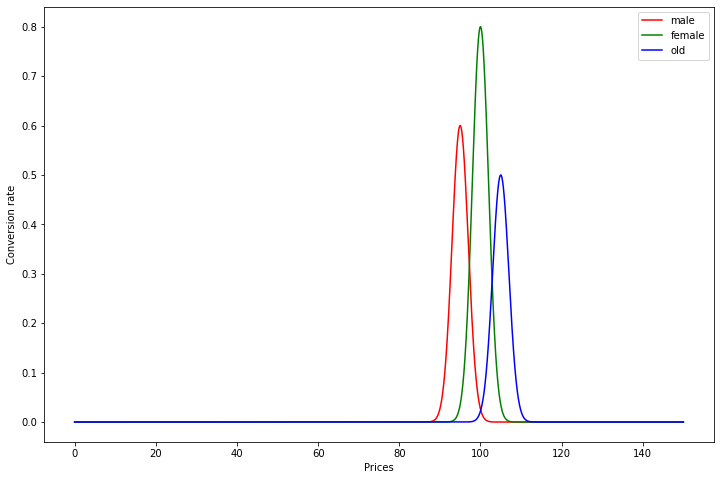

In [17]:
mu_3 = [95, 100 ,105]
sigma_3 = [2, 2, 2]
scale_3 = [0.6, 0.8, 0.5]
cv_3 = []
cv_3.append(cv_curve(mu_3[0], sigma_3[0], prices, scale_3[0]))
cv_3.append(cv_curve(mu_3[1], sigma_3[1], prices, scale_3[1]))
cv_3.append(cv_curve(mu_3[2], sigma_3[2], prices, scale_3[2]))
cv_3


plt.figure(figsize=(12,8))
plt.plot(prices, cv_3[0], color="red", label="male")
plt.plot(prices, cv_3[1], color="green", label="female")
plt.plot(prices, cv_3[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

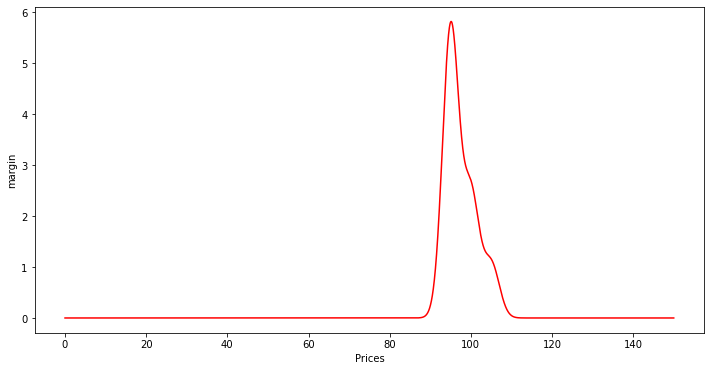

In [18]:
expected_margin_3 = 0
for i in range(classes):
    expected_margin_3 += cv_3[i] * customer_distribution[i] * alphas[2][i] * n_items[2][i]
expected_margin_3 = expected_margin_3 * prices

plt.figure(figsize=(12,6))
plt.plot(prices, expected_margin_3, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [19]:
selected_prices_3 = np.array([90, 95, 100, 105]) * cents
product1_margins_3 = [expected_margin_3[p] for p in selected_prices_3]
product1_margins_3

[0.2390691299949783, 5.801323259809867, 2.705427520163246, 1.1598290962025202]

In [20]:
c1_p3 = [cv_3[0][p] for p in selected_prices_3] 
c2_p3 = [cv_3[1][p] for p in selected_prices_3]
c3_p3 = [cv_3[2][p] for p in selected_prices_3]
print(c1_p3, c2_p3, c3_p3)

[0.026560558053263947, 0.5999979997366408, 0.026143272477398144, 2.197190112469368e-06] [3.0263730677446133e-06, 0.03542880878501158, 0.799996666229124, 0.03484314464592403] [3.1203873757626417e-13, 1.8930586928617275e-06, 0.022152216433476236, 0.499997499672885]


# Hats
all customers have decreasing demand.

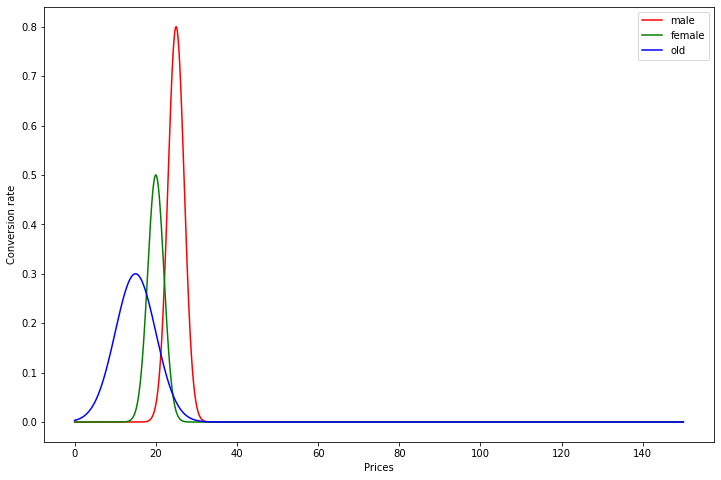

In [21]:
mu_4 = [25, 20 ,15]
sigma_4 = [2, 2, 5]
scale_4 = [0.8, 0.5, 0.3]
cv_4 = []
cv_4.append(cv_curve(mu_4[0], sigma_4[0], prices, scale_4[0]))
cv_4.append(cv_curve(mu_4[1], sigma_4[1], prices, scale_4[1]))
cv_4.append(cv_curve(mu_4[2], sigma_4[2], prices, scale_4[2]))
cv_4

plt.figure(figsize=(12,8))
plt.plot(prices, cv_4[0], color="red", label="male")
plt.plot(prices, cv_4[1], color="green", label="female")
plt.plot(prices, cv_4[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

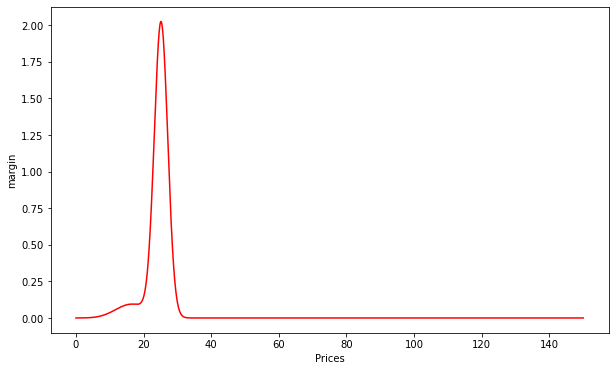

In [22]:
expected_margin_4 = 0
for i in range(classes):
    expected_margin_4 += cv_4[i] * customer_distribution[i] * alphas[3][i] * n_items[3][i]
expected_margin_4 = expected_margin_4 * prices


plt.figure(figsize=(10,6))

plt.plot(prices, expected_margin_4, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [23]:
selected_prices_4 = np.array([20, 25, 30, 35]) * cents
product1_margins_4 = [expected_margin_4[p] for p in selected_prices_4]
product1_margins_4

[0.1432201916325603,
 2.0204231009232174,
 0.10718968188162291,
 8.069506774599433e-05]

In [24]:
c1_p4 = [cv_4[0][p] for p in selected_prices_4] 
c2_p4 = [cv_4[1][p] for p in selected_prices_4]
c3_p4 = [cv_4[2][p] for p in selected_prices_4]
print(c1_p4, c2_p4, c3_p4)


[0.035208186636729165, 0.8, 0.03506177158094131, 2.96397997406927e-06] [0.5, 0.02192274102830972, 1.8540320727908192e-06, 3.0243856701061437e-13] [0.18191067586581616, 0.04057352368848947, 0.00332870165524, 0.00010045108309362438]


## Shirt
girls have a decreasing demand curve.

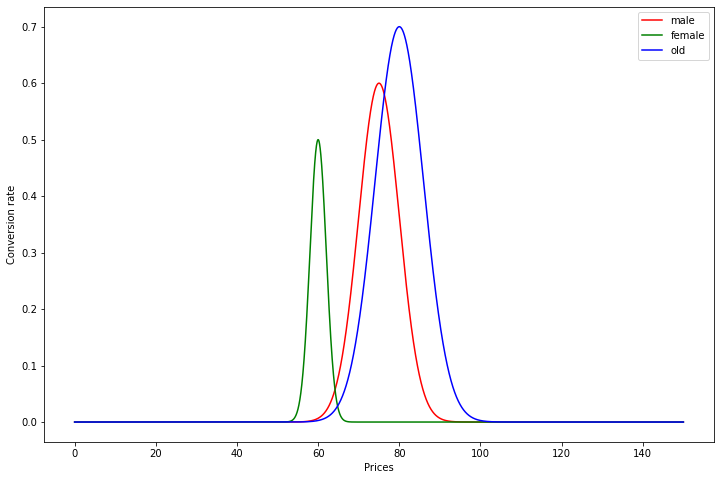

In [25]:
mu_5 = [75, 60 ,80]
sigma_5 = [5, 2, 6]
scale_5 = [0.6, 0.5, 0.7]
cv_5 = []
cv_5.append(cv_curve(mu_5[0], sigma_5[0], prices, scale_5[0]))
cv_5.append(cv_curve(mu_5[1], sigma_5[1], prices, scale_5[1]))
cv_5.append(cv_curve(mu_5[2], sigma_5[2], prices, scale_5[2]))
cv_5



plt.figure(figsize=(12,8))
plt.plot(prices, cv_5[0], color="red", label="male")
plt.plot(prices, cv_5[1], color="green", label="female")
plt.plot(prices, cv_5[2], color="blue", label="old")
plt.xlabel("Prices")
plt.ylabel("Conversion rate")
plt.legend()
plt.show()

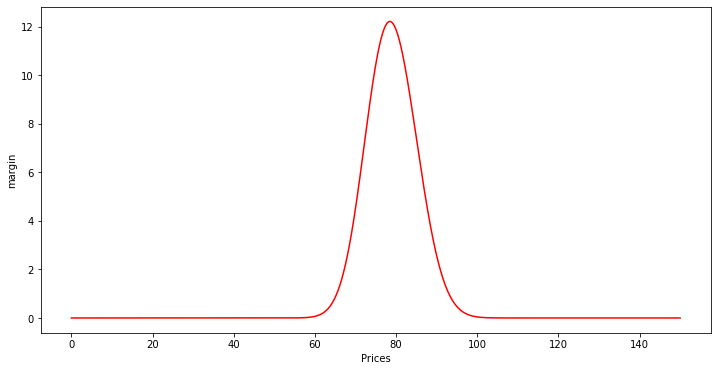

In [26]:
expected_margin_5 = 0
for i in range(classes):
    expected_margin_5 += cv_5[i] * customer_distribution[i] * alphas[4][i] * n_items[4][i]
expected_margin_5 = expected_margin_5 * prices


plt.figure(figsize=(12,6))

plt.plot(prices, expected_margin_5, color="red")
plt.xlabel("Prices")
plt.ylabel("margin")
plt.show()

In [27]:
selected_prices_5 = np.array([60, 70, 80, 90]) * cents
product1_margins_5 = [expected_margin_5[p] for p in selected_prices_5]
product1_margins_5

[0.06621969736773237,
 4.5075655951091305,
 11.86903341724696,
 2.5692281268554793]

In [28]:
c1_p5 = [cv_5[0][p] for p in selected_prices_5] 
c2_p5 = [cv_5[1][p] for p in selected_prices_5]
c3_p5 = [cv_5[2][p] for p in selected_prices_5]
print(c1_p5, c2_p5, c3_p5)

[0.006681416361585578, 0.3642582576970407, 0.3635303722615871, 0.006641442575052423] [0.5, 1.84171133103899e-06, 9.389949902202083e-23, 6.626667038082558e-50] [0.002712165057471637, 0.17477297200625705, 0.6999999351765454, 0.17425582373645027]


## Get conversion rates tables

In [33]:
approximation = 2
c1 = np.around([c1_p1, c1_p2, c1_p3, c1_p4, c1_p5], approximation)
c1 = c1.tolist()
c1

[[0.0, 0.04, 0.8, 0.04],
 [0.0, 0.49, 0.26, 0.0],
 [0.03, 0.6, 0.03, 0.0],
 [0.04, 0.8, 0.04, 0.0],
 [0.01, 0.36, 0.36, 0.01]]

In [34]:
c2 = np.around([c2_p1, c2_p2, c2_p3, c2_p4, c2_p5], approximation)
c2 = c2.tolist()

In [35]:
c3 = np.around([c3_p1, c3_p2, c3_p3, c3_p4, c3_p5], approximation)
c3 = c3.tolist()

## Build jsons
there is no way to automatize click graph generation...

In [39]:

classes = []
classes.append(
    {
        "features": [0, 0],
        "alpha": [a[0] for a in alphas],
        "buy_distribution": c1,
        "num_prods_distribution": [([1 / n[0]] * 4) for n in n_items],
        "click_graph": boy_graph
    }
)
classes.append(
    {
        "features": [0, 1],
        "alpha": [a[1] for a in alphas],
        "buy_distribution": c2,
        "num_prods_distribution": [([1 / n[1]] * 4) for n in n_items],
        "click_graph": girl_graph
    }
)
classes.append(
    {
        "features": [1, 0],
        "alpha": [a[2] for a in alphas],
        "buy_distribution": c3,
        "num_prods_distribution": [([1 / n[2]] * 4) for n in n_items],
        "click_graph": old_graph
    }
)
classes.append(
    {
        "features": [1, 1],
        "alpha": [a[2] for a in alphas],
        "buy_distribution": c3,
        "num_prods_distribution": [([1 / n[2]] * 4) for n in n_items],
        "click_graph": old_graph
    }
)


# writing customers in file
file_path = os.path.abspath('') + "\\code\\data\\customer3.json"

with open(file_path, 'w') as outfile:
    json.dump({"classes": classes}, outfile)

